In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Download and Load the Data

In [4]:
trainMnist = np.loadtxt('/Users/nikolai/Downloads/mnist_train.csv', delimiter=",")
testMnist = np.loadtxt('/Users/nikolai/Downloads/mnist_test.csv', delimiter=",") 
print(trainMnist.shape)
print(testMnist.shape)

convert = 255  *0.99 + 0.01
train_imgs = np.asfarray(trainMnist[:, 1:], dtype=np.int8) / convert
test_imgs = np.asfarray(testMnist[:, 1:], dtype=np.int8) / convert
train_labels = np.asfarray(trainMnist[:, :1], dtype=np.int8)
test_labels = np.asfarray(testMnist[:, :1], dtype=np.int8)

(60000, 785)
(10000, 785)


## Visualize

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


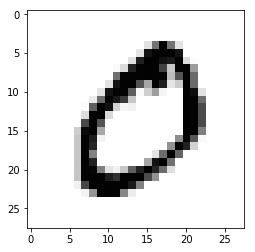

In [5]:
print(train_imgs.shape)
print(test_imgs.shape)
print(train_labels.shape)
print(test_labels.shape)
sampleImage = train_imgs[1].reshape((28,28))
plt.imshow(sampleImage, cmap="Greys")
plt.show()

## Standardize the data

In [6]:
from sklearn.preprocessing import StandardScaler
myScaler = StandardScaler()
myScaler.fit(train_imgs)
train_imgs = myScaler.transform(train_imgs)
test_imgs = myScaler.transform(test_imgs)

## Make an instance of PCA that explains 95% of variance

In [7]:
myPca = PCA(.95)

## Reduce the dimensionality of your data 

In [8]:
myPca.fit(train_imgs)
myPca.n_components_
predicted_train = myPca.fit_transform(train_imgs)

prediction = myPca.inverse_transform(predicted_train)

## Plot original image next to approximated image

Original Image: 


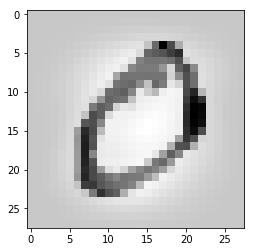

95% Explained Variance: 


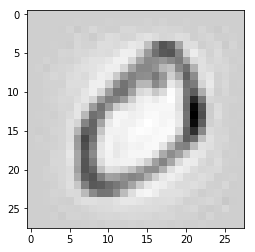

In [9]:
print('Original Image: ')
plt.imshow(train_imgs[1].reshape(28,28), cmap = "Greys");
plt.show()
print('95% Explained Variance: ')
plt.imshow(prediction[1].reshape(28, 28), cmap = "Greys")
plt.show()


## Graph of Explained Variance vs Number of Principal Components

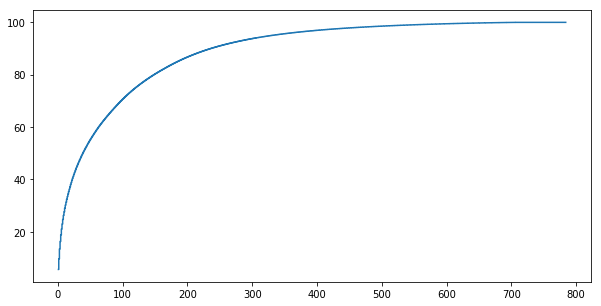

In [10]:
myPca = PCA()
myPca.fit(train_imgs)
total = sum(myPca.explained_variance_)
var_exp = [(i/total)*100 for i in sorted(myPca.explained_variance_, reverse=True)] 
explainedVariance = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.step(range(1, 785), explainedVariance, where='mid',label='cumulative explained variance')
plt.show()

# Logistic Regression

In [11]:
train_data = np.loadtxt('/Users/nikolai/Downloads/mnist_train.csv', delimiter=",")
test_data = np.loadtxt('/Users/nikolai/Downloads/mnist_test.csv', delimiter=",") 
print(train_data.shape)
print(test_data.shape)

convert = 255  *0.99 + 0.01
train_imgs = np.asfarray(train_data[:, 1:], dtype=np.int8) / convert
test_imgs = np.asfarray(test_data[:, 1:], dtype=np.int8) / convert
train_labels = np.asfarray(train_data[:, :1], dtype=np.int8)
test_labels = np.asfarray(test_data[:, :1], dtype=np.int8)

(60000, 785)
(10000, 785)


In [12]:
idx = 0
for i in np.nditer(train_labels):
    idx += 1
    if i == 0.0:
        train_labels[idx-1] = 1
    else:
        train_labels[idx-1] = 0

idx = 0
for i in np.nditer(test_labels):
    idx += 1
    if i == 0.0:
        test_labels[idx-1] = 1
    else:
        test_labels[idx-1] = 0

In [13]:
print('Logistic regression without PCA:')
y = train_labels.ravel()
train_labels = np.array(y).astype(int)
myLR = LogisticRegression()
myLR.fit(train_imgs, train_labels)
myLR.predict(test_imgs[0].reshape(1,-1))
myLR.score(test_imgs, test_labels)

Logistic regression without PCA:


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9922

In [14]:
myScaler = StandardScaler()
myScaler.fit(train_imgs)
train_imgs = myScaler.transform(train_imgs)
test_imgs = myScaler.transform(test_imgs)

myPca = PCA(.95)

myPca.fit(train_imgs)
myPca.n_components_
predicted_train = myPca.fit_transform(train_imgs)

prediction = myPca.inverse_transform(predicted_train)

In [15]:
print('Logistic regression with PCA:')
y = train_labels.ravel()
train_labels = np.array(y).astype(int)
myLR = LogisticRegression()
myLR.fit(train_imgs, train_labels)
myLR.predict(test_imgs[0].reshape(1,-1))
myLR.score(test_imgs, test_labels)

Logistic regression with PCA:


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.991

It appears that the original logistic regression without PCA is more accurate.